In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
bank=pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank.shape

(210, 7)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

#### Checking summary statistic

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


#### From the above summary,it can be seen that the Std Deviation of spending is high when compared with the other variables. Also, there are no null values present in any of the variables.

In [8]:
dups=bank.duplicated()
print('Number of duplicate rows=%d'%dups.sum())

Number of duplicate rows=0


#### Exploratory Data Analysis

In [9]:
def univariate(column):
    print('Description of ' + column)
    print("----------------------------------------------------------------------------")
    print(bank[column].describe().round(2))
    print('\n')
    plt.figure()
    print('Distribution of ' + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(bank[column],kde=True,color='g')
    plt.title('Distribution of ' + column)
    plt.show();
    plt.figure()
    print('Boxplot of ' + column)
    print("----------------------------------------------------------------------------")
    ax=sns.boxplot(y=bank[column])
    plt.title('Boxplot of ' + column)
    plt.show();
    print('\n')
    print('Skewness of ' + column)
    print("----------------------------------------------------------------------------")
    print(stats.skew(bank[column]))
    

Description of spending
----------------------------------------------------------------------------
count    210.00
mean      14.85
std        2.91
min       10.59
25%       12.27
50%       14.36
75%       17.30
max       21.18
Name: spending, dtype: float64


Distribution of spending
----------------------------------------------------------------------------


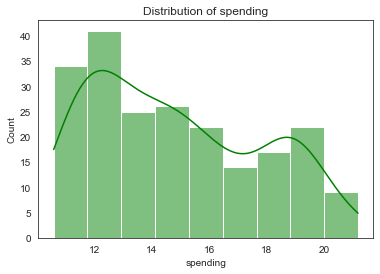

Boxplot of spending
----------------------------------------------------------------------------


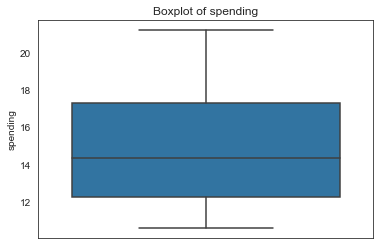



Skewness of spending
----------------------------------------------------------------------------
0.39702715402072153


In [10]:
univariate('spending')

Description of advance_payments
----------------------------------------------------------------------------
count    210.00
mean      14.56
std        1.31
min       12.41
25%       13.45
50%       14.32
75%       15.72
max       17.25
Name: advance_payments, dtype: float64


Distribution of advance_payments
----------------------------------------------------------------------------


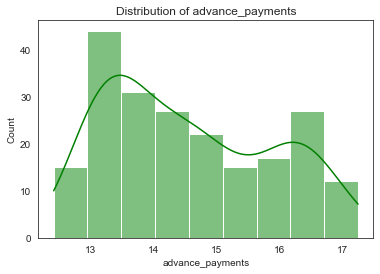

Boxplot of advance_payments
----------------------------------------------------------------------------


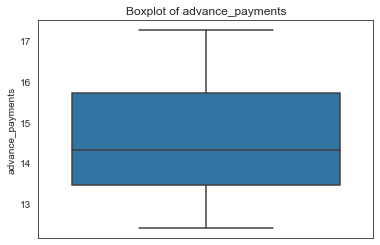



Skewness of advance_payments
----------------------------------------------------------------------------
0.38380604212562563


In [11]:
univariate('advance_payments')

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.00
mean       0.87
std        0.02
min        0.81
25%        0.86
50%        0.87
75%        0.89
max        0.92
Name: probability_of_full_payment, dtype: float64


Distribution of probability_of_full_payment
----------------------------------------------------------------------------


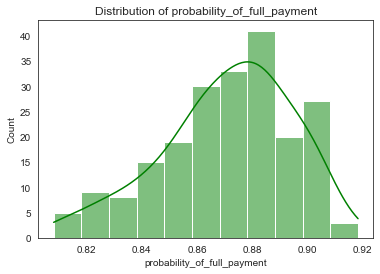

Boxplot of probability_of_full_payment
----------------------------------------------------------------------------


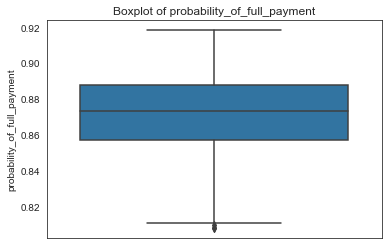



Skewness of probability_of_full_payment
----------------------------------------------------------------------------
-0.5341035521949097


In [12]:
univariate('probability_of_full_payment')

Description of current_balance
----------------------------------------------------------------------------
count    210.00
mean       5.63
std        0.44
min        4.90
25%        5.26
50%        5.52
75%        5.98
max        6.68
Name: current_balance, dtype: float64


Distribution of current_balance
----------------------------------------------------------------------------


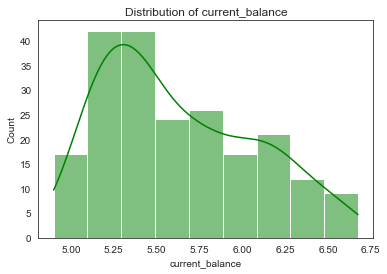

Boxplot of current_balance
----------------------------------------------------------------------------


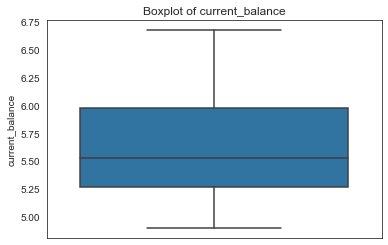



Skewness of current_balance
----------------------------------------------------------------------------
0.5217206481959239


In [13]:
univariate('current_balance')

Description of credit_limit
----------------------------------------------------------------------------
count    210.00
mean       3.26
std        0.38
min        2.63
25%        2.94
50%        3.24
75%        3.56
max        4.03
Name: credit_limit, dtype: float64


Distribution of credit_limit
----------------------------------------------------------------------------


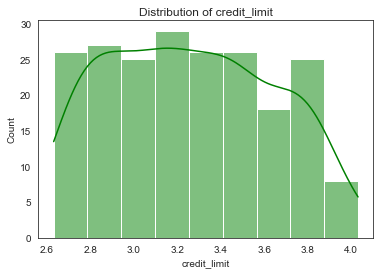

Boxplot of credit_limit
----------------------------------------------------------------------------


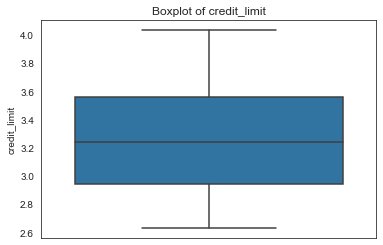



Skewness of credit_limit
----------------------------------------------------------------------------
0.13341648969738146


In [14]:
univariate('credit_limit')

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.00
mean       3.70
std        1.50
min        0.77
25%        2.56
50%        3.60
75%        4.77
max        8.46
Name: min_payment_amt, dtype: float64


Distribution of min_payment_amt
----------------------------------------------------------------------------


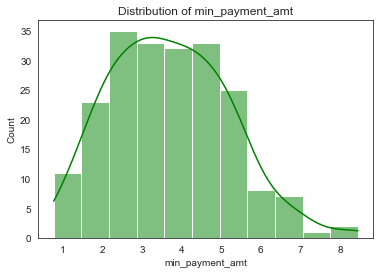

Boxplot of min_payment_amt
----------------------------------------------------------------------------


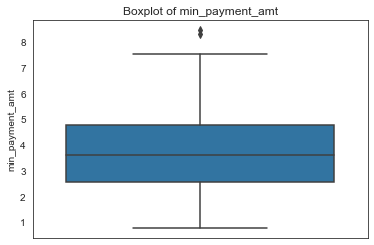



Skewness of min_payment_amt
----------------------------------------------------------------------------
0.3987925792256687


In [15]:
univariate('min_payment_amt')

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.00
mean       5.41
std        0.49
min        4.52
25%        5.04
50%        5.22
75%        5.88
max        6.55
Name: max_spent_in_single_shopping, dtype: float64


Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


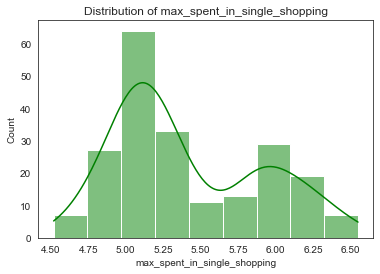

Boxplot of max_spent_in_single_shopping
----------------------------------------------------------------------------


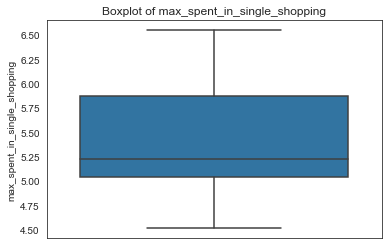



Skewness of max_spent_in_single_shopping
----------------------------------------------------------------------------
0.5578758322317957


In [16]:
univariate('max_spent_in_single_shopping')

#### Multivariate plot

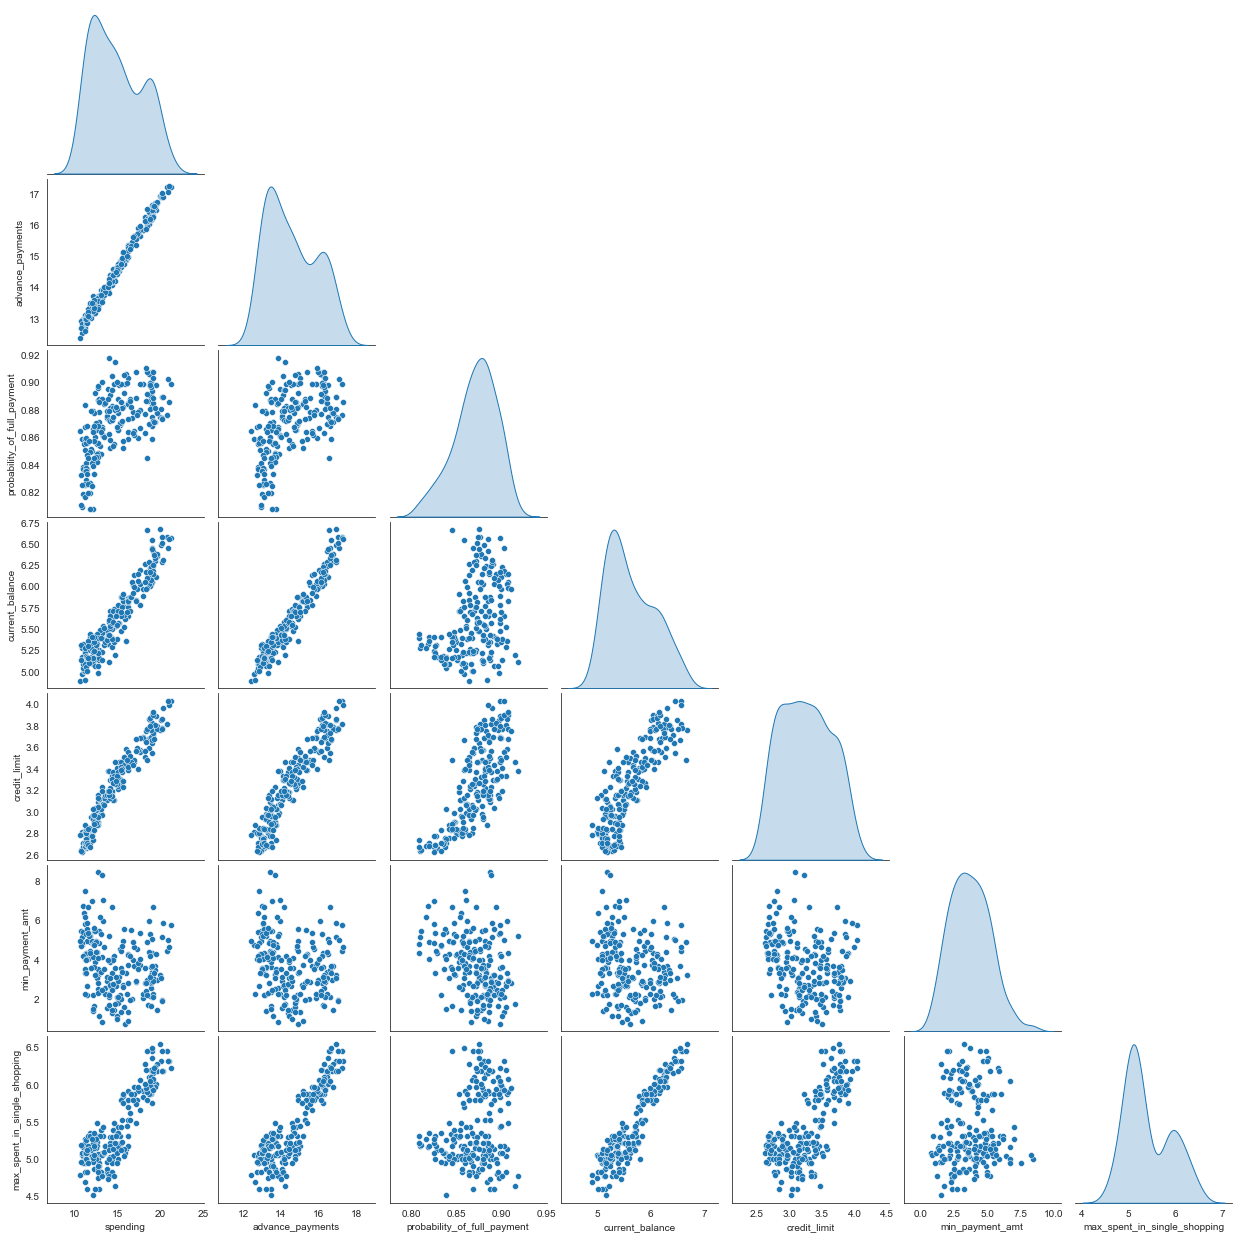

In [17]:
sns.pairplot(data=bank,corner=True,diag_kind='kde');

In [18]:
bank.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


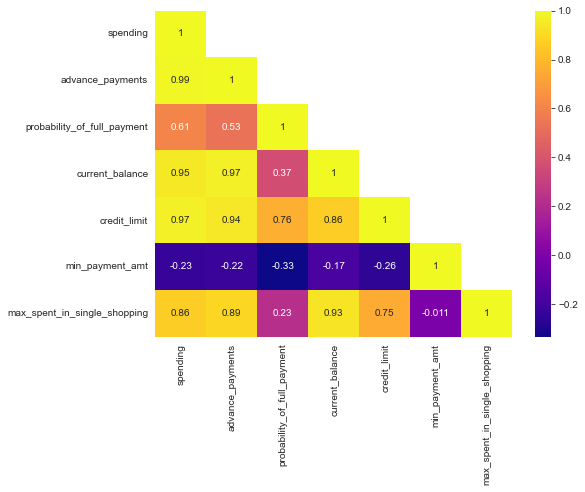

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(bank.corr(),cmap='plasma',fmt='.2g',annot=True,mask=np.triu(bank.corr(),+1));

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [22]:
scaled_bank=pd.DataFrame(sc.fit_transform(bank),columns=bank.columns)

In [23]:
scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [24]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [25]:
wardlink=linkage(scaled_bank,method='ward')

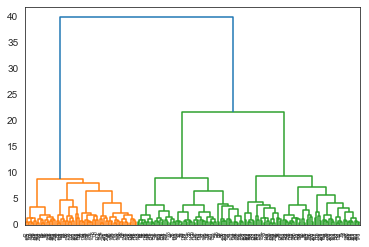

In [26]:
dend=dendrogram(wardlink)

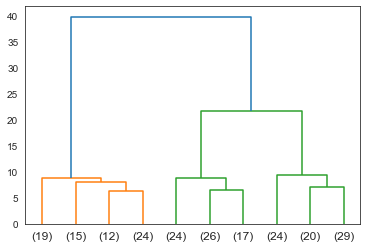

In [27]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=10)

In [28]:
from scipy.cluster.hierarchy import fcluster

In [29]:
clusters_ward=fcluster(wardlink,3,criterion='maxclust')

In [30]:
clusters_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [31]:
# creating a copy of original dataset
bank_clust_ward=bank

In [32]:
bank_clust_ward['cluster']=clusters_ward

In [33]:
bank_clust_ward.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Cluster Frequency

In [34]:
bank_clust_ward.cluster.value_counts().sort_index()

1    70
2    67
3    73
Name: cluster, dtype: int64

In [35]:
aggdata=bank_clust_ward.groupby('cluster').mean()

In [36]:
aggdata['Freq']=bank_clust_ward.cluster.value_counts().sort_index()

In [37]:
aggdata.T

cluster,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


#### Average method

In [38]:
wardlink_1=linkage(scaled_bank,method='average')

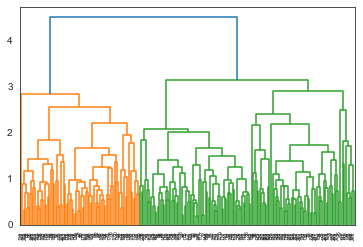

In [39]:
dend_1=dendrogram(wardlink_1)

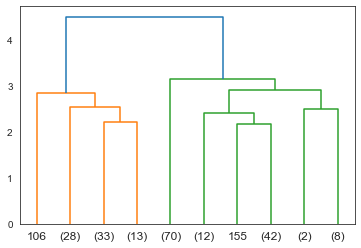

In [40]:
dend_1=dendrogram(wardlink_1,truncate_mode='lastp',p=10)

In [41]:
clusters_avg=fcluster(wardlink_1,3,criterion='maxclust')

In [42]:
clusters_avg

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [43]:
# creating a copy of original dataset
bank_clust_avg=bank

In [44]:
bank_clust_avg['cluster']=clusters_avg

In [45]:
bank_clust_avg.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Cluster frequency

In [46]:
bank_clust_avg.cluster.value_counts().sort_index()

1    75
2    70
3    65
Name: cluster, dtype: int64

#### Cluster Profiles

In [47]:
aggdata_1=bank_clust_avg.groupby('cluster').mean()
aggdata_1['Freq']=bank_clust_avg.cluster.value_counts().sort_index()

In [48]:
aggdata_1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
cluster,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

#### Calculating WSS for other values of K - Elbow Method

In [49]:
wss=[]

In [50]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1234)
    KM.fit(scaled_bank)
    wss.append(KM.inertia_)

In [51]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 326.7106563112604,
 289.78108648541325,
 262.3514166762972,
 240.21576991668834,
 221.19157003791327,
 206.75989785298916]

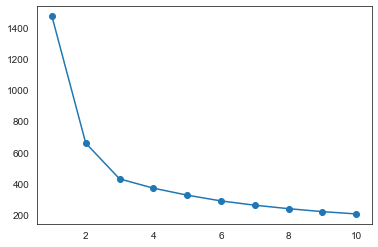

In [52]:
plt.plot(range(1,11), wss, marker = 'o');

#### Cluster evaluation for multiple values : the silhouette score

In [53]:
ss = []
for k in range(2,11):
    sil_km = KMeans(n_clusters=k, random_state=1234)
    sil_km.fit(scaled_bank)
    labels = sil_km.labels_
    ss.append(silhouette_score(scaled_bank,labels))

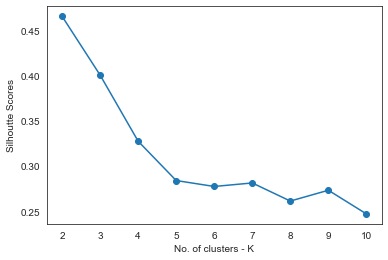

In [54]:
plt.plot(range(2,11),ss,marker ='o')
plt.xlabel('No. of clusters - K')
plt.ylabel('Silhoutte Scores');

In [55]:
k_means=KMeans(n_clusters=3,random_state=1234)

In [56]:
k_means.fit(scaled_bank)

KMeans(n_clusters=3, random_state=1234)

In [57]:
labels=k_means.labels_

In [58]:
labels

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [59]:
# silhouette_score --> overall clusters quality, closer to 1 the better
silhouette_score(scaled_bank,labels)

0.40072705527512986

In [60]:
# silouette_sample --> for 'a' particular observation, how close it is to its cluster centroid
sil_width=silhouette_samples(scaled_bank,labels)
sil_width

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [61]:
sil_width.min()

0.002713089347678376

In [62]:
k_means.inertia_

430.65897315130064

In [63]:
# Appending Clusters labels to the original dataset
bank["K_means_clust"] = labels
bank['Sil_width']=sil_width
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster,K_means_clust,Sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.362276


#### Cluster Profiling

In [64]:
bank.K_means_clust.value_counts().sort_index()

0    72
1    67
2    71
Name: K_means_clust, dtype: int64

In [65]:
clust_profile=bank.drop(['cluster'],axis=1)

In [66]:
clust_profile.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_means_clust,Sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [67]:
clust_profile=clust_profile.groupby('K_means_clust').mean()
clust_profile.T

K_means_clust,0,1,2
spending,11.856944,18.495373,14.437887
advance_payments,13.247778,16.203433,14.337746
probability_of_full_payment,0.848253,0.884210,0.881597
current_balance,5.231750,6.175687,5.514577
credit_limit,2.849542,3.697537,3.259225
min_payment_amt,4.742389,3.632373,2.707341
max_spent_in_single_shopping,5.101722,6.041701,5.120803
Sil_width,0.397473,0.468772,0.339816


In [68]:
clust_profile.round(0)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Sil_width
K_means_clust,,,,,,,,
0,12.0,13.0,1.0,5.0,3.0,5.0,5.0,0.0
1,18.0,16.0,1.0,6.0,4.0,4.0,6.0,0.0
2,14.0,14.0,1.0,6.0,3.0,3.0,5.0,0.0


In [69]:
clust_profile['freq']=bank.K_means_clust.value_counts().sort_index()
clust_profile.round(0)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Sil_width,freq
K_means_clust,,,,,,,,,
0,12.0,13.0,1.0,5.0,3.0,5.0,5.0,0.0,72
1,18.0,16.0,1.0,6.0,4.0,4.0,6.0,0.0,67
2,14.0,14.0,1.0,6.0,3.0,3.0,5.0,0.0,71


### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [70]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [71]:
insur_df=pd.read_csv('insurance_part2_data.csv')

In [72]:
insur_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [73]:
insur_df.shape

(3000, 10)

In [74]:
insur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [75]:
insur_df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [76]:
insur_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
dup=insur_df.duplicated()
print('Number of duplicate rows=%d'%dup.sum())

Number of duplicate rows=139


In [78]:
insur_df.drop_duplicates(inplace=True)

In [79]:
dup=insur_df.duplicated()
print('Number of duplicate rows=%d'%dup.sum())
print(insur_df.shape)

Number of duplicate rows=0
(2861, 10)


In [80]:
insur_df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

#### Checking for outliers

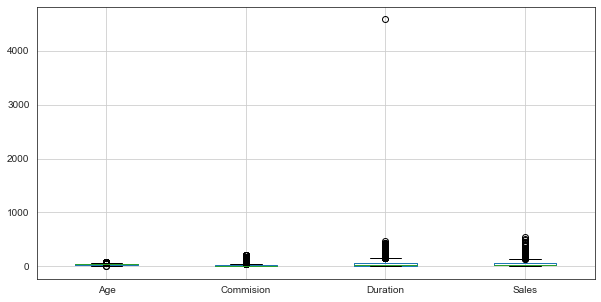

In [81]:
plt.figure(figsize=(10,5))
insur_df[['Age','Commision','Duration','Sales']].boxplot();

#### Geting unique counts of all Objects

In [82]:
for col in insur_df.columns:
    if insur_df[col].dtype == 'object':
        print(col)
        print('_____')
        print(insur_df[col].value_counts())
        print('\n')

Agency_Code
_____
EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64


Type
_____
Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64


Claimed
_____
No     1947
Yes     914
Name: Claimed, dtype: int64


Channel
_____
Online     2815
Offline      46
Name: Channel, dtype: int64


Product Name
_____
Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64


Destination
_____
ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64




In [83]:
def univariate(column):
    print('Description of ' + column)
    print("----------------------------------------------------------------------------")
    print(insur_df[column].describe().round(2))
    print('\n')
    plt.figure()
    print('Distribution of ' + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(insur_df[column],kde=True,color='g')
    plt.title('Distribution of ' + column)
    plt.show();
    plt.figure()
    print('Boxplot of ' + column)
    print("----------------------------------------------------------------------------")
    ax=sns.boxplot(y=insur_df[column])
    plt.title('Boxplot of ' + column)
    plt.show();
    print('\n')
    print('Skewness of ' + column)
    print("----------------------------------------------------------------------------")
    print(stats.skew(insur_df[column]))

Description of Age
----------------------------------------------------------------------------
count    2861.00
mean       38.20
std        10.68
min         8.00
25%        31.00
50%        36.00
75%        43.00
max        84.00
Name: Age, dtype: float64


Distribution of Age
----------------------------------------------------------------------------


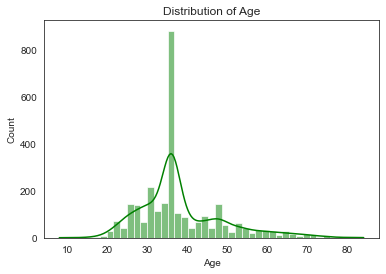

Boxplot of Age
----------------------------------------------------------------------------


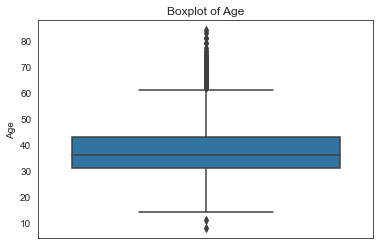



Skewness of Age
----------------------------------------------------------------------------
1.1025661500650201


In [84]:
univariate('Age')

Description of Commision
----------------------------------------------------------------------------
count    2861.00
mean       15.08
std        25.83
min         0.00
25%         0.00
50%         5.63
75%        17.82
max       210.21
Name: Commision, dtype: float64


Distribution of Commision
----------------------------------------------------------------------------


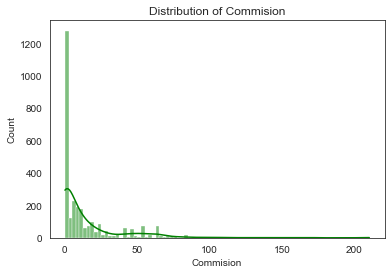

Boxplot of Commision
----------------------------------------------------------------------------


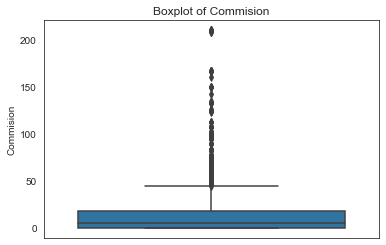



Skewness of Commision
----------------------------------------------------------------------------
3.1031126292410716


In [85]:
univariate('Commision')

Description of Duration
----------------------------------------------------------------------------
count    2861.00
mean       72.12
std       135.98
min        -1.00
25%        12.00
50%        28.00
75%        66.00
max      4580.00
Name: Duration, dtype: float64


Distribution of Duration
----------------------------------------------------------------------------


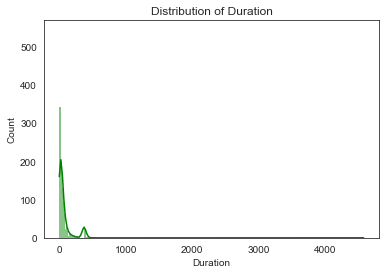

Boxplot of Duration
----------------------------------------------------------------------------


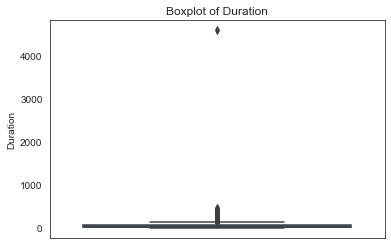



Skewness of Duration
----------------------------------------------------------------------------
13.778867077621834


In [86]:
univariate('Duration')

Description of Sales
----------------------------------------------------------------------------
count    2861.00
mean       61.76
std        71.40
min         0.00
25%        20.00
50%        33.50
75%        69.30
max       539.00
Name: Sales, dtype: float64


Distribution of Sales
----------------------------------------------------------------------------


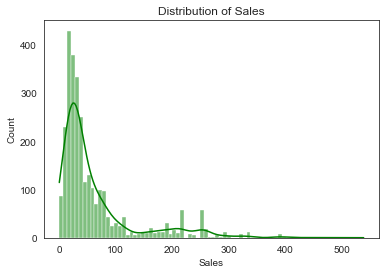

Boxplot of Sales
----------------------------------------------------------------------------


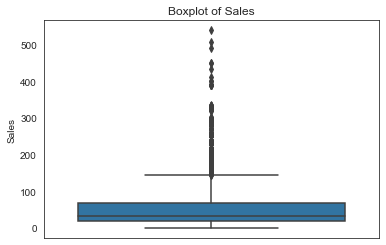



Skewness of Sales
----------------------------------------------------------------------------
2.3434132352067008


In [87]:
univariate('Sales')

#### Categorical variables

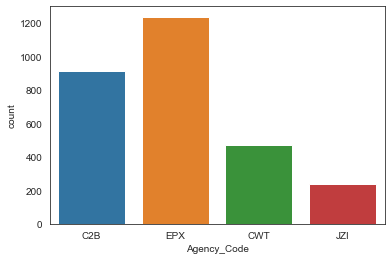

In [88]:
sns.countplot(insur_df['Agency_Code']);

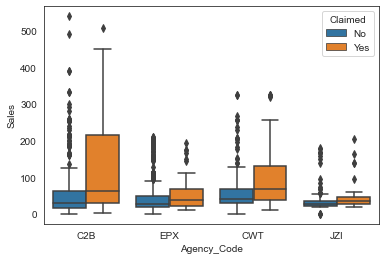

In [89]:
sns.boxplot(data=insur_df,x=insur_df.Agency_Code,y=insur_df.Sales,hue=insur_df.Claimed);

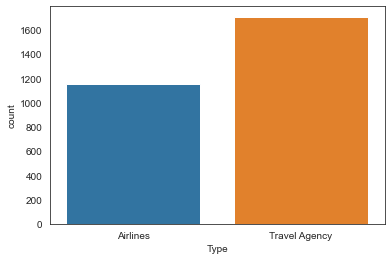

In [90]:
sns.countplot(insur_df['Type']);

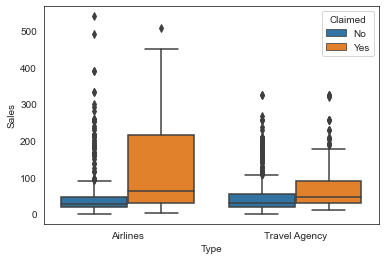

In [91]:
sns.boxplot(data=insur_df,x=insur_df.Type,y=insur_df.Sales,hue=insur_df.Claimed);

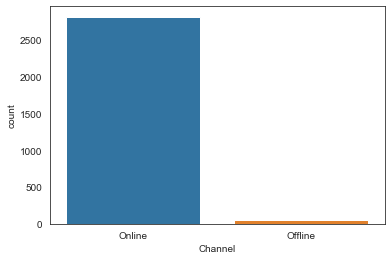

In [92]:
sns.countplot(insur_df['Channel']);

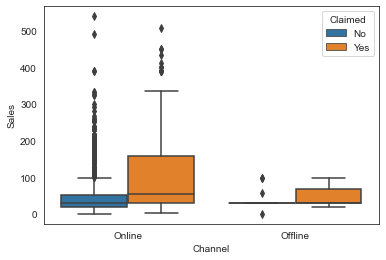

In [93]:
sns.boxplot(data=insur_df,x=insur_df.Channel,y=insur_df.Sales,hue=insur_df.Claimed);

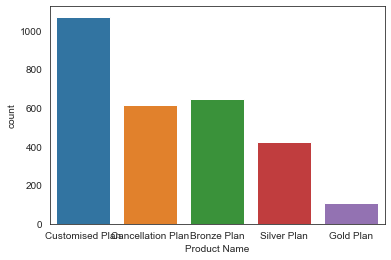

In [94]:
sns.countplot(insur_df['Product Name']);

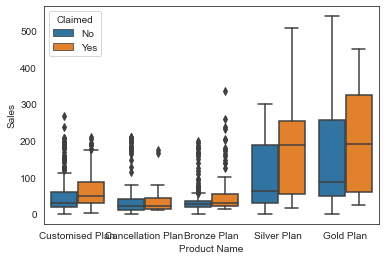

In [95]:
sns.boxplot(data=insur_df,x=insur_df['Product Name'],y=insur_df.Sales,hue=insur_df.Claimed);

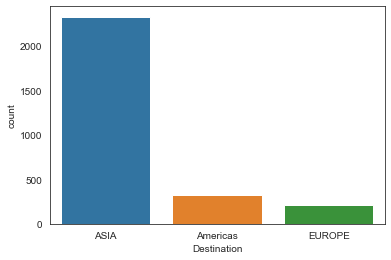

In [96]:
sns.countplot(insur_df['Destination']);

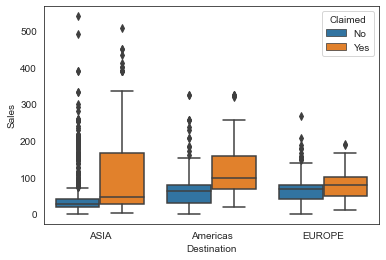

In [97]:
sns.boxplot(data=insur_df,x=insur_df.Destination,y=insur_df.Sales,hue=insur_df.Claimed);

#### Pairwise istribution of continuous variable

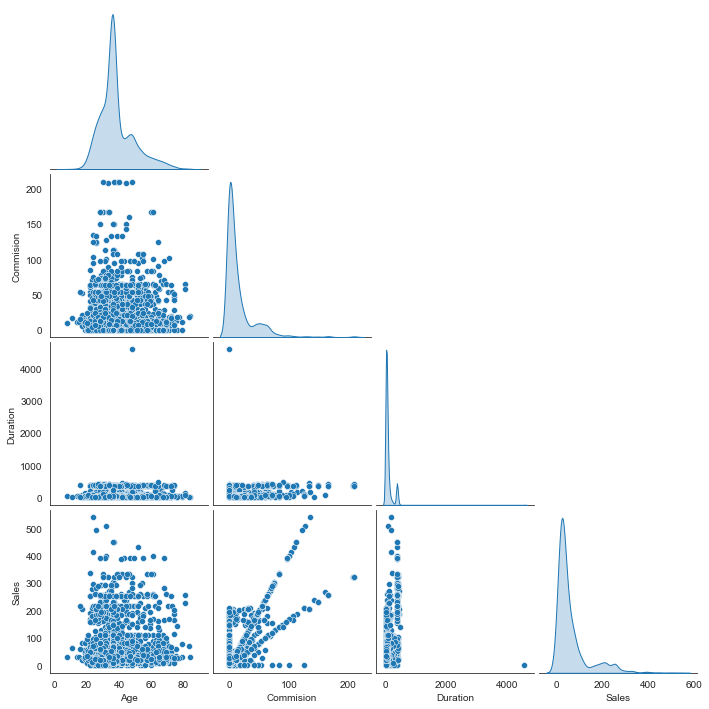

In [98]:
sns.pairplot(insur_df[['Age','Commision','Duration','Sales']],diag_kind='kde',corner=True);

#### Checking for correlation

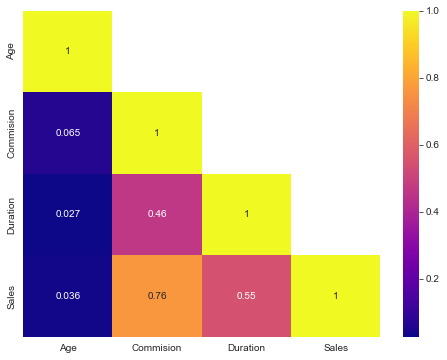

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(insur_df[['Age','Commision','Duration','Sales']].corr(),cmap='plasma',fmt='.2g',annot=True,mask=np.triu(insur_df[['Age','Commision','Duration','Sales']].corr(),+1));

In [100]:
def out_limit(col):
    Q1,Q3=col.quantile([0.25,0.75]) # calculating q1 and q3
    IQR=Q3-Q1# calculating IQR
    lower_range= Q1-(1.5 * IQR) # lower range below which we will treat values as outliers
    upper_range= Q3+(1.5 * IQR) # upper range below which we will treat values as outliers
    return lower_range, upper_range    # return the lower and upper ranges

In [101]:
# creating a list of numeric features with outliers to loop through
OL_cols = ['Age','Commision','Duration','Sales']

In [102]:
for column in OL_cols:
    lr,ur = out_limit(insur_df[column])
    insur_df[column] = np.where(insur_df[column] > ur, ur, insur_df[column]) # np.where(condition,return if true, return if false)
    insur_df[column] = np.where(insur_df[column] < lr, lr, insur_df[column])

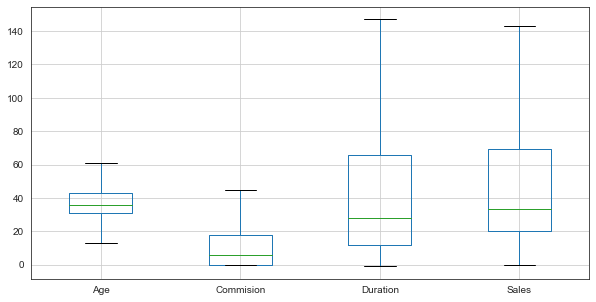

In [103]:
plt.figure(figsize=(10,5))
insur_df[['Age','Commision','Duration','Sales']].boxplot();

#### Converting all objects to Categotical types

In [104]:
for feature in insur_df.columns:
    if insur_df[feature].dtype=='object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insur_df[feature].unique()))
        print(pd.Categorical(insur_df[feature].unique()).codes)
        insur_df[feature]=pd.Categorical(insur_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [105]:
insur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 193.1 KB


In [106]:
insur_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


#### Proportion of 1s and 0s

In [107]:
insur_df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

##### There is no issue of class imbalance, here we have reasonable proportions in both the classes

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [108]:
X=insur_df.drop('Claimed',axis=1)
Y=insur_df['Claimed']

In [109]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


#### Splitting the data into train and test set

In [110]:
X_train,X_test,train_labels,test_labels=train_test_split(X,Y,test_size=0.30,random_state=1234)

#### Checking the dimensions of traning and test data

In [111]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


### MODEL I

#### Building a Decision Tree

In [112]:
dt_model=DecisionTreeClassifier(criterion='gini')

In [113]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

#### Checking the Feature Imprtance

In [114]:
dt_model.feature_importances_

array([0.18101424, 0.19325795, 0.00093162, 0.08844001, 0.00533664,
       0.24012648, 0.21034426, 0.05370069, 0.0268481 ])

In [115]:
pd.DataFrame(dt_model.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
Duration,0.240126
Sales,0.210344
Agency_Code,0.193258
Age,0.181014
Commision,0.088440
Product Name,0.053701
Destination,0.026848
Channel,0.005337
Type,0.000932


#### Optimal parameters for Decision Tree

#### Grid Search for finding out optimal parameters

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid={
    'max_depth':[4,5,6],
    'min_samples_leaf':[0,40,60,70],
    'min_samples_split':[150,200,250,300]
}

In [118]:
dt_model=DecisionTreeClassifier()

In [119]:
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=10)

#### Fitting the optimal values to the  training dataset

In [120]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [0, 40, 60, 70],
                         'min_samples_split': [150, 200, 250, 300]})

### Best grid

In [121]:
print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 200}


In [122]:
best_grid = grid_search.best_estimator_

In [123]:
best_grid

DecisionTreeClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=200)

#### Regularising the Decision Tree(Pruning)
Adding Tuning Parameters

In [124]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', 
                                      max_depth = 4,
                                      min_samples_leaf=40,
                                      min_samples_split=200)

reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=200)

#### Generating new tree

In [125]:
train_char_label=['No','Yes']
insurance_tree_file=open('d:\insurance_tree.dot','w')
dot_data=tree.export_graphviz(reg_dt_model,out_file=insurance_tree_file,
                             feature_names=list(X_train),class_names=train_char_label)
insurance_tree_file.close()

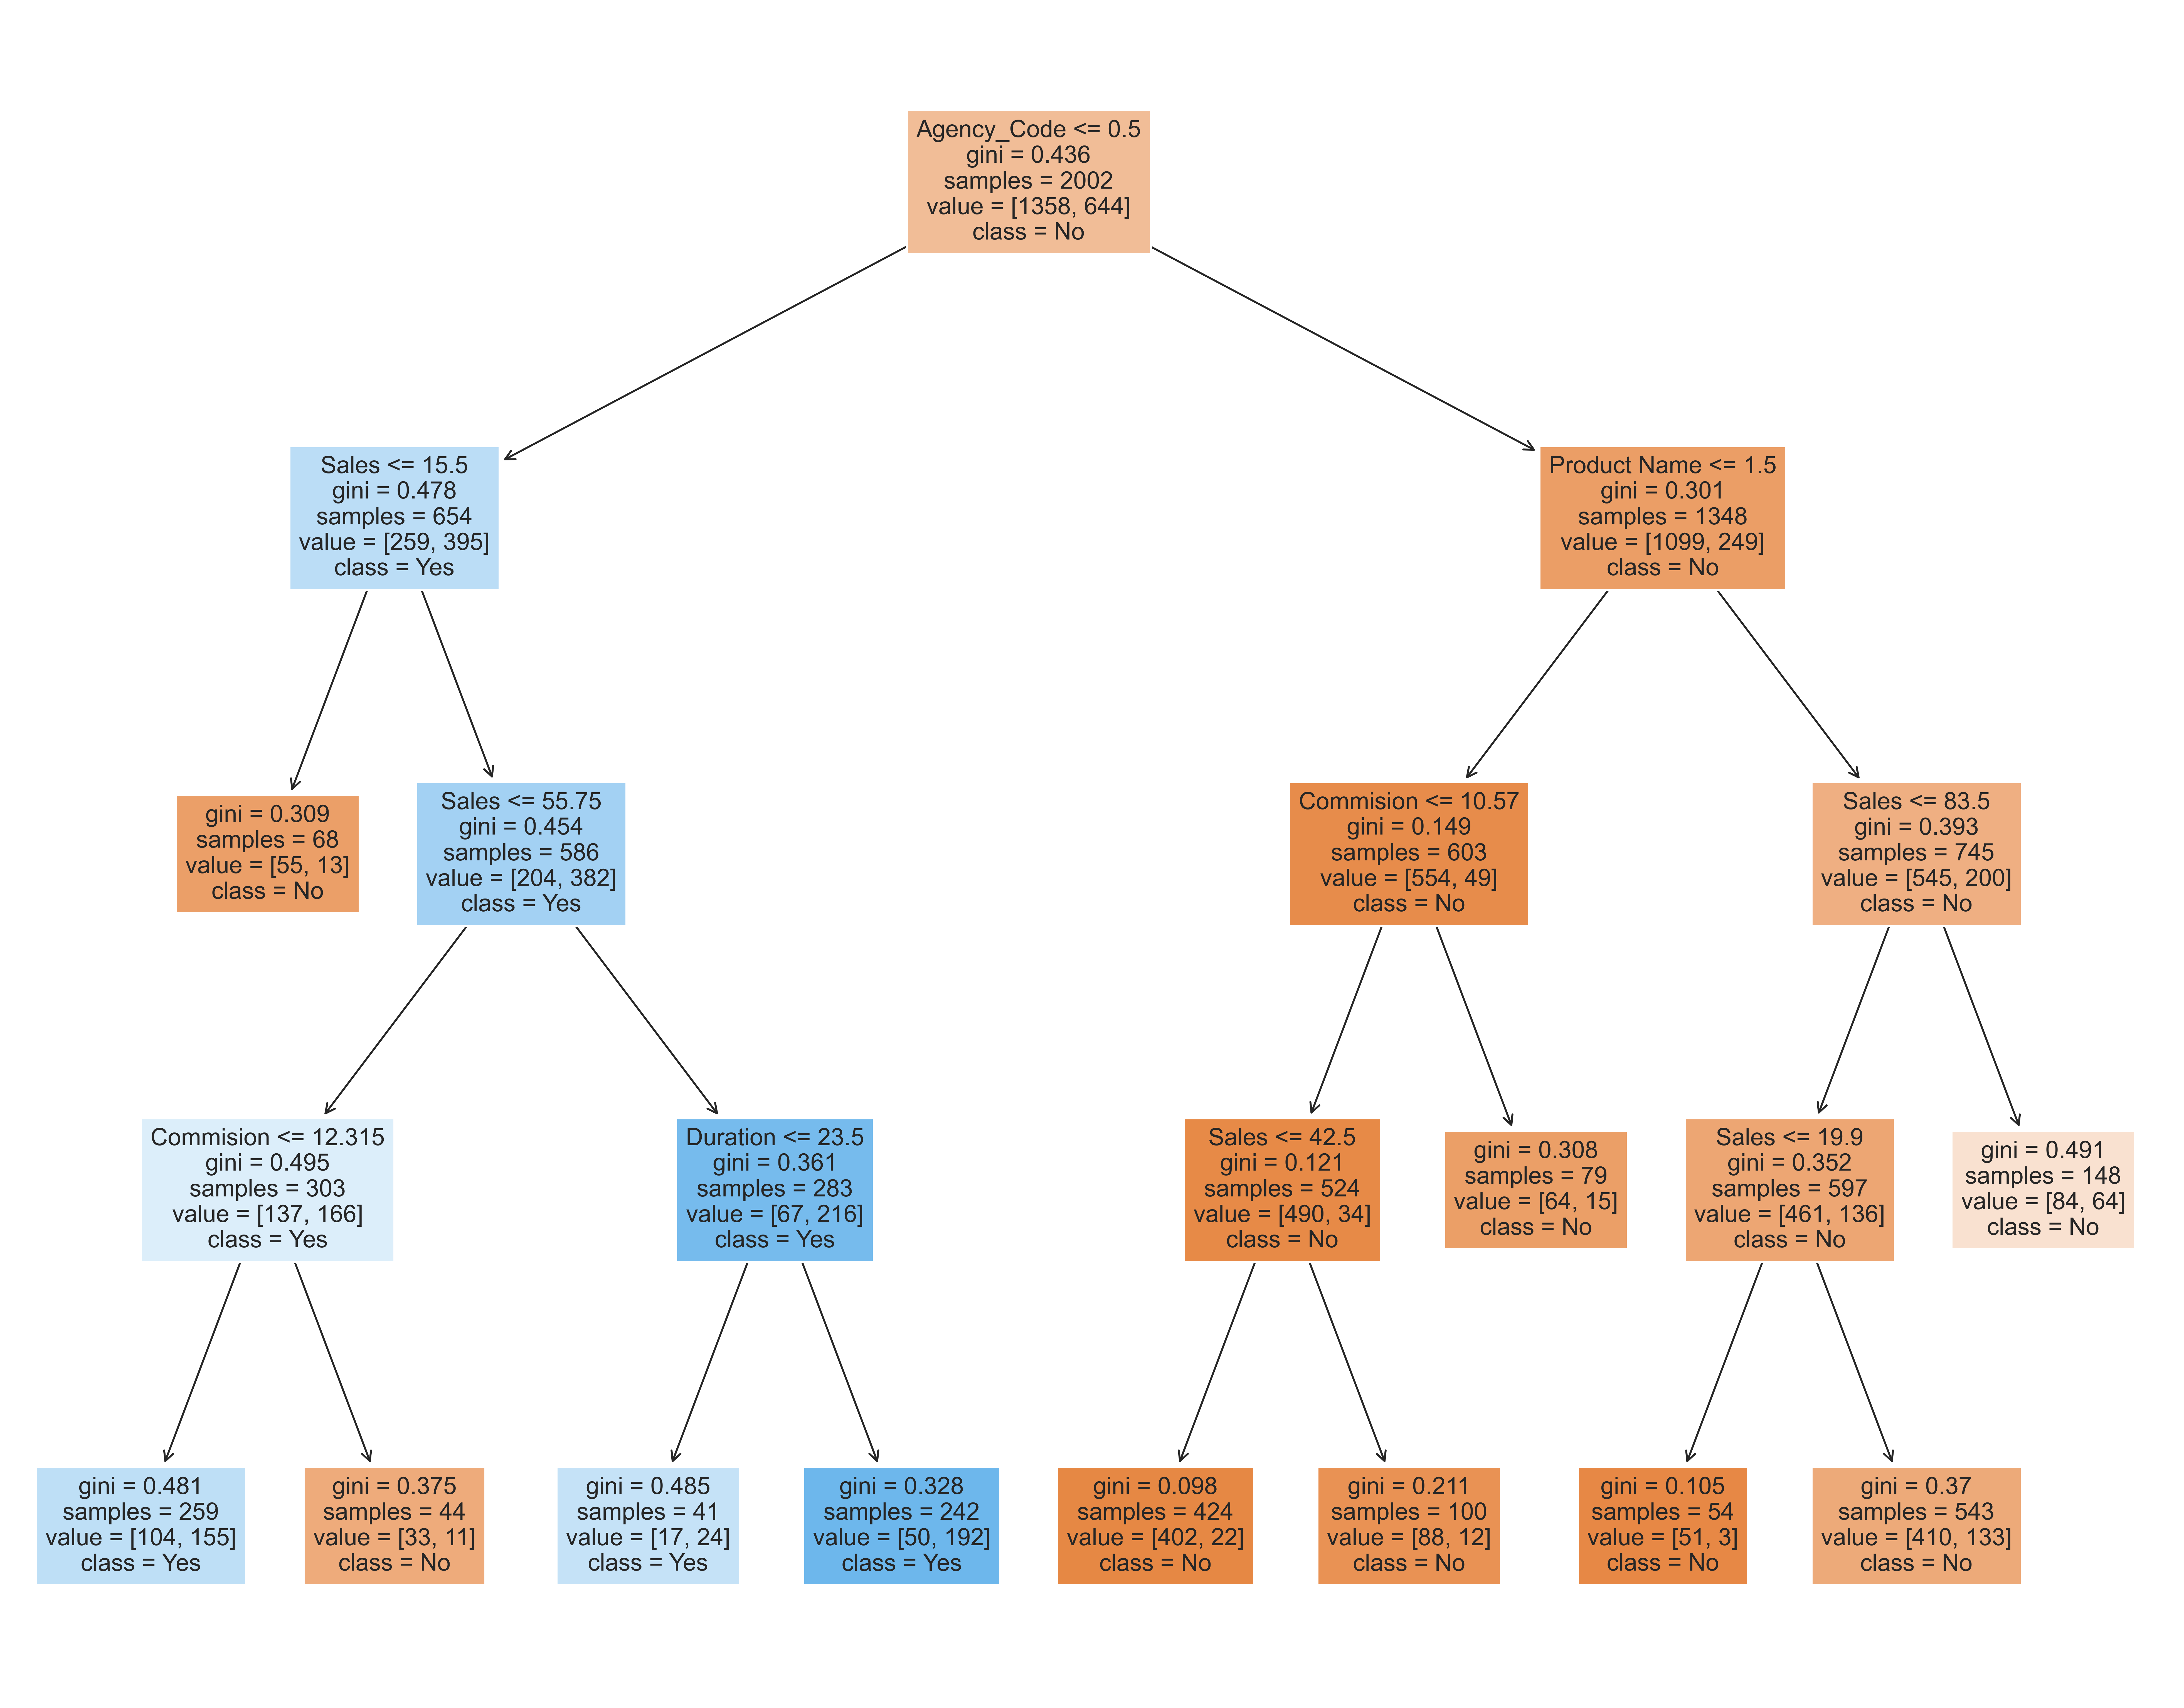

In [126]:
plt.figure(figsize=(20,16), dpi=500)
tree.plot_tree(reg_dt_model,
               filled=True,
               class_names=list(train_char_label),
               feature_names=list(X_train));

#### Variable Importance

In [127]:
pd.DataFrame(reg_dt_model.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
Agency_Code,0.628982
Sales,0.217970
Product Name,0.094896
Commision,0.045824
Duration,0.012328
Age,0.000000
Type,0.000000
Channel,0.000000
Destination,0.000000


### Predicting on Training dataset for decision tree

In [128]:
ytrain_predict_dt=reg_dt_model.predict(X_train)

In [129]:
ytest_predict_dt=reg_dt_model.predict(X_test)

#### Confusion Matrix and Accuracy for the training data :

In [130]:
confusion_matrix(train_labels,ytrain_predict_dt)

array([[1187,  171],
       [ 273,  371]], dtype=int64)

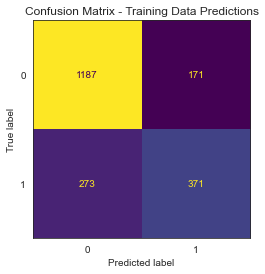

In [131]:
plot_confusion_matrix(reg_dt_model,
                      X_train,
                      train_labels,
                      colorbar=False)
plt.title('Confusion Matrix - Training Data Predictions');

In [132]:
cart_train_acc=best_grid.score(X_train,train_labels)

In [133]:
cart_train_acc

0.7782217782217782

#### Classification Report for the training data:

In [134]:
print(classification_report(train_labels,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1358
           1       0.68      0.58      0.63       644

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.73      2002
weighted avg       0.77      0.78      0.77      2002



#### AUC and ROC for the training data

AUC: 0.810


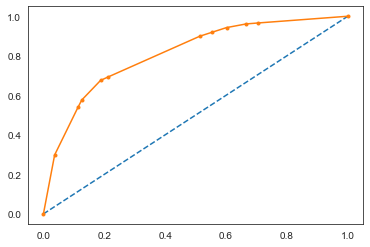

In [135]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
dt_auc_train = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % dt_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
dt_fpr_train, dt_tpr_train, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_fpr_train, dt_tpr_train, marker='.')
# show the plot
plt.show()

#### AUC and ROC for the testing data :

AUC: 0.787


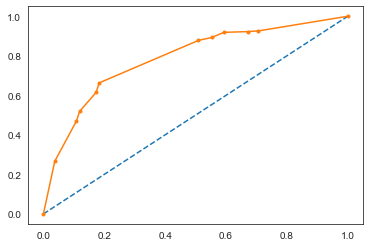

In [136]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
dt_auc_test = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % dt_auc_test)
# calculate roc curve
from sklearn.metrics import roc_curve
dt_fpr_test, dt_tpr_test, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_fpr_test,dt_tpr_test, marker='.')
# show the plot
plt.show()

#### Confusion Matrix and Accuracy for the testing data : 

In [137]:
confusion_matrix(test_labels,ytest_predict_dt)

array([[519,  70],
       [130, 140]], dtype=int64)

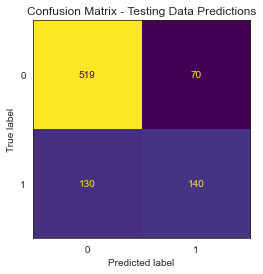

In [138]:
plot_confusion_matrix(reg_dt_model,
                      X_test,
                      test_labels,
                      colorbar=False)
plt.title('Confusion Matrix - Testing Data Predictions');

In [139]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7671711292200233

#### Classification Report for the testing data: 

In [140]:
print(classification_report(test_labels,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       589
           1       0.67      0.52      0.58       270

    accuracy                           0.77       859
   macro avg       0.73      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



### MODEL II

#### Building an Ensemble RandomForest Classifier

### RandomForest Classifier

In [141]:
X=insur_df.drop('Claimed',axis=1)
Y=insur_df['Claimed']

In [142]:
X_train,X_test,train_labels,test_labels=train_test_split(X,Y,test_size=0.30,random_state=1234)

In [143]:
rfcl=RandomForestClassifier(n_estimators=100,max_features=6,random_state=1234)
rfcl=rfcl.fit(X_train,train_labels)

In [144]:
rfcl

RandomForestClassifier(max_features=6, random_state=1234)

#### Grid search for finding out the optimal values for hyper parameters

In [145]:
param_grid={
    'max_depth':[6],#6,20,30,40
    'max_features':[7],#4,7,8,9,
    'min_samples_leaf':[8],#8,50,100
    'min_samples_split':[45],#45,60,70
    'n_estimators':[200]#100,200
}

In [146]:
rfcl=RandomForestClassifier(random_state=1234)

In [147]:
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=10,scoring='recall')

In [148]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1234),
             param_grid={'max_depth': [6], 'max_features': [7],
                         'min_samples_leaf': [8], 'min_samples_split': [45],
                         'n_estimators': [200]},
             scoring='recall')

### BEST GRID VALUES

In [149]:
print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 8, 'min_samples_split': 45, 'n_estimators': 200}


In [150]:
best_grid = grid_search.best_estimator_

In [151]:
best_grid

RandomForestClassifier(max_depth=6, max_features=7, min_samples_leaf=8,
                       min_samples_split=45, n_estimators=200,
                       random_state=1234)

 ### Variable Importance

In [152]:
pd.DataFrame(best_grid.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
Agency_Code,0.421048
Sales,0.183155
Product Name,0.177454
Commision,0.072739
Duration,0.070359
Age,0.054099
Destination,0.011849
Type,0.008837
Channel,0.000460


 ### Prediction Using Best Model from Grid Search

In [153]:
grid_pred_train = best_grid.predict(X_train)
grid_pred_test = best_grid.predict(X_test)

#### Confusion Matrix and Accuracy for the training data : 

In [154]:
confusion_matrix(train_labels,grid_pred_train)

array([[1197,  161],
       [ 247,  397]], dtype=int64)

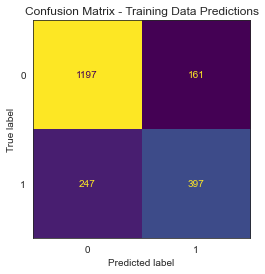

In [155]:
plot_confusion_matrix(best_grid,
                      X_train,
                      train_labels,
                      colorbar=False)
plt.title('Confusion Matrix - Training Data Predictions');

In [156]:
rf_train_acc=best_grid.score(X_train,train_labels)
rf_train_acc

0.7962037962037962

#### Classification Report for the training data:

In [157]:
print(classification_report(train_labels,grid_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1358
           1       0.71      0.62      0.66       644

    accuracy                           0.80      2002
   macro avg       0.77      0.75      0.76      2002
weighted avg       0.79      0.80      0.79      2002



#### AUC & ROC PLOT FOR TRAINING DATA:

AUC: 0.852


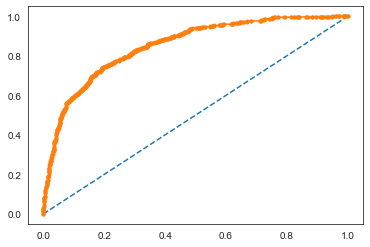

In [158]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_auc_train = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_fpr_train, rf_tpr_train, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_fpr_train, rf_tpr_train, marker='.')
# show the plot
plt.show()

#### Confusion Matrix and Accuracy for the testing data :

In [159]:
confusion_matrix(test_labels,grid_pred_test)

array([[520,  69],
       [127, 143]], dtype=int64)

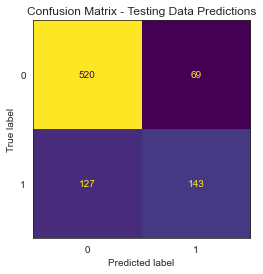

In [160]:
plot_confusion_matrix(best_grid,
                      X_test,
                      test_labels,
                      colorbar=False)
plt.title('Confusion Matrix - Testing Data Predictions');

In [161]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7718277066356228

#### Classification Report for the testing data: 

In [162]:
print(classification_report(test_labels,grid_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       589
           1       0.67      0.53      0.59       270

    accuracy                           0.77       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



#### ROC PLOT FOR TEST DATA

AUC: 0.811


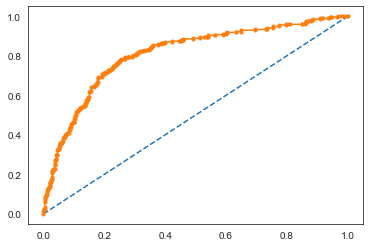

In [163]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_auc_test = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_auc_test)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_fpr_test, rf_tpr_test, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_fpr_test, rf_tpr_test, marker='.')
# show the plot
plt.show()

### MODEL 3
Building a Neural Network Classifier
BEFORE BUILDING THE MODEL
WE SCALE THE VALUES, TO STANDARD SCALE USING MINMAXSCALER

In [164]:
X=insur_df.drop('Claimed',axis=1)
Y=insur_df['Claimed']

In [165]:
X_train,X_test,train_labels,test_labels=train_test_split(X,Y,test_size=0.30,random_state=1234)

In [166]:
sc = StandardScaler()

In [167]:
X_train = sc.fit_transform(X_train)

In [168]:
X_test = sc.transform(X_test)

### Building Neural Network Model¶

In [169]:
param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [170]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500],
                         'max_iter': [5000, 2500, 7000, 6000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [171]:
print(grid_search.best_params_)

{'hidden_layer_sizes': 500, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}


In [172]:
best_grid = grid_search.best_estimator_

In [173]:
best_grid

MLPClassifier(hidden_layer_sizes=500, max_iter=5000, random_state=1, tol=0.01)

In [174]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### Confusion Matrix and Accuracy for the training data :

In [175]:
confusion_matrix(train_labels,ytrain_predict)

array([[1213,  145],
       [ 333,  311]], dtype=int64)

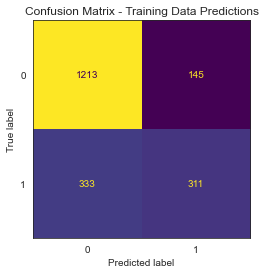

In [176]:
plot_confusion_matrix(best_grid,
                      X_train,
                      train_labels,
                      colorbar=False)
plt.title('Confusion Matrix - Training Data Predictions');

In [177]:
nn_train_acc=best_grid.score(X_train,train_labels)
nn_train_acc

0.7612387612387612

#### Classification Report for the training data: 

In [178]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.84      1358
           1       0.68      0.48      0.57       644

    accuracy                           0.76      2002
   macro avg       0.73      0.69      0.70      2002
weighted avg       0.75      0.76      0.75      2002



#### ROC PLOT FOR TRAINING DATA

AUC: 0.808


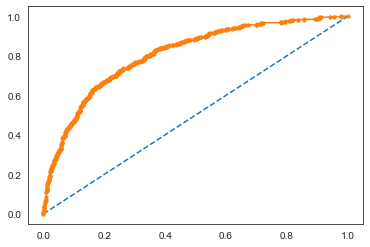

In [179]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
nn_auc_train = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % nn_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_fpr_train, nn_tpr_train, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_fpr_train, nn_tpr_train, marker='.')
# show the plot
plt.show()

#### Confusion Matrix and Accuracy for the testing data :

In [180]:
confusion_matrix(test_labels,ytest_predict)

array([[532,  57],
       [146, 124]], dtype=int64)

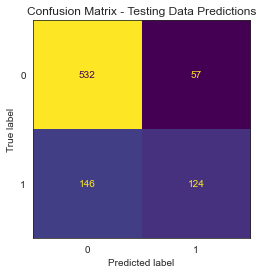

In [181]:
plot_confusion_matrix(best_grid,
                      X_test,
                      test_labels,
                      colorbar=False)
plt.title('Confusion Matrix - Testing Data Predictions');

In [182]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7636786961583236

#### Classification Report for the testing data:

In [183]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       589
           1       0.69      0.46      0.55       270

    accuracy                           0.76       859
   macro avg       0.73      0.68      0.69       859
weighted avg       0.75      0.76      0.75       859



#### ROC PLOT FOR TESTING DATA:

AUC: 0.788


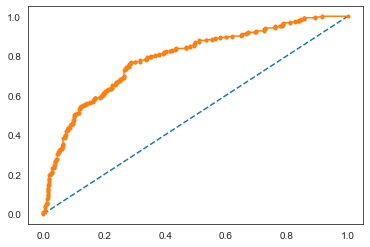

In [184]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
nn_auc_test = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % nn_auc_test)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_fpr_test, nn_tpr_test, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_fpr_test, nn_tpr_test, marker='.')
# show the plot
plt.show()

### Comparing all the models

#### ROC Curve for all the 3 models ( Training data):

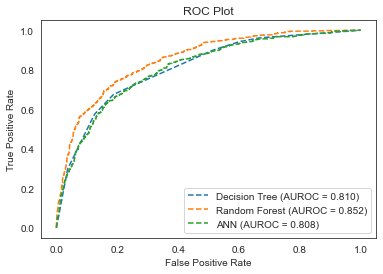

In [185]:
plt.plot(dt_fpr_train, dt_tpr_train,  linestyle='--',label='Decision Tree (AUROC = %0.3f)' % dt_auc_train)
plt.plot(rf_fpr_train, rf_tpr_train,  linestyle='--',label='Random Forest (AUROC = %0.3f)' % rf_auc_train)
plt.plot(nn_fpr_train, nn_tpr_train,  linestyle='--',label='ANN (AUROC = %0.3f)' % nn_auc_train)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

#### ROC Curve for all the 3 models ( Testing data):

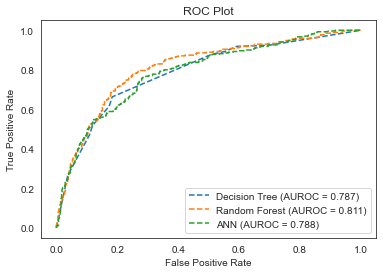

In [186]:
plt.plot(dt_fpr_test, dt_tpr_test,  linestyle='--',label='Decision Tree (AUROC = %0.3f)' % dt_auc_test)
plt.plot(rf_fpr_test, rf_tpr_test,  linestyle='--',label='Random Forest (AUROC = %0.3f)' % rf_auc_test)
plt.plot(nn_fpr_test, nn_tpr_test,  linestyle='--',label='ANN (AUROC = %0.3f)' % nn_auc_test)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [187]:
model_comparison=pd.read_excel('Model Comparison.xlsx')

In [188]:
model_comparison

,,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
0,Accuracy,0.78,0.76,0.80,0.77,0.76,0.76
1,AUC,0.81,0.78,0.85,0.81,0.81,0.79
2,Recall,0.62,0.54,0.62,0.53,0.48,0.46
3,Precision,0.68,0.65,0.71,0.67,0.68,0.69
4,F1 Score,0.65,0.59,0.66,0.59,0.57,0.55
